# Loading in our data from main.ipynb to build the initial model

### Loading the data

In [ ]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

with open("prepared_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val = data["X_val"]
X_test = data["X_test"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
num_classes = data["num_classes"]

### Data Normalization

In [45]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Building the model

In [46]:
def leNet_model_iteration3(num_classes):
    model = Sequential()
    model.add(Conv2D(64, (5,5), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = leNet_model_iteration3(num_classes)


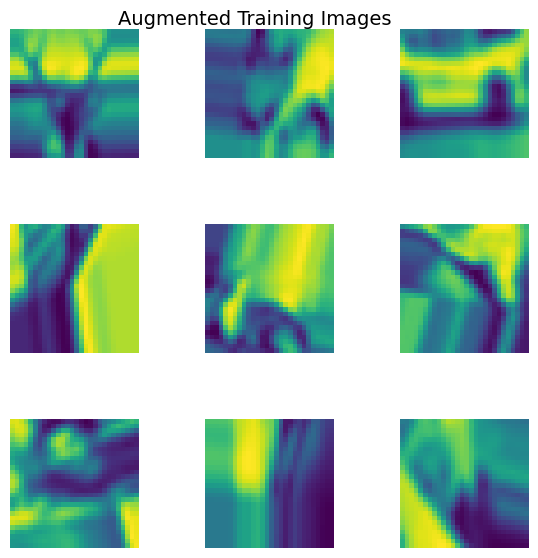

In [47]:
datagen = ImageDataGenerator(
    width_shift_range=0.5,
    height_shift_range=0.2,
    zoom_range=0.4,
    shear_range=0.3,
    rotation_range=15
)

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=50)

batches = datagen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
fig.tight_layout()

for i in range(9):
    r = i // 3
    c = i % 3
    axs[r, c].imshow(X_batch[i])
    axs[r, c].axis('off')

plt.suptitle('Augmented Training Images', fontsize=14)
plt.show()

### Training the model

In [48]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 50,
    epochs=30,
    batch_size=50,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.1488 - loss: 2.6554 - val_accuracy: 0.2719 - val_loss: 2.3819
Epoch 2/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2081 - loss: 2.5099 - val_accuracy: 0.3015 - val_loss: 2.3139
Epoch 3/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.2390 - loss: 2.4434 - val_accuracy: 0.3073 - val_loss: 2.2675
Epoch 4/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.2569 - loss: 2.3907 - val_accuracy: 0.3174 - val_loss: 2.2131
Epoch 5/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.2653 - loss: 2.3692 - val_accuracy: 0.3429 - val_loss: 2.1698
Epoch 6/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2741 - loss: 2.3525 - val_accuracy: 0.3565 - val_loss: 2.1241
Epoch 7/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.2823 - loss: 2.3263 - val_accuracy: 0.3505 - val_loss: 2.1161
Epoch 8/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.2906 - loss: 2.3069 - 

### Evaluating the model

285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5357 - loss: 1.4704
Test Loss: 1.794258952140808
Test Accuracy: 0.4650549590587616


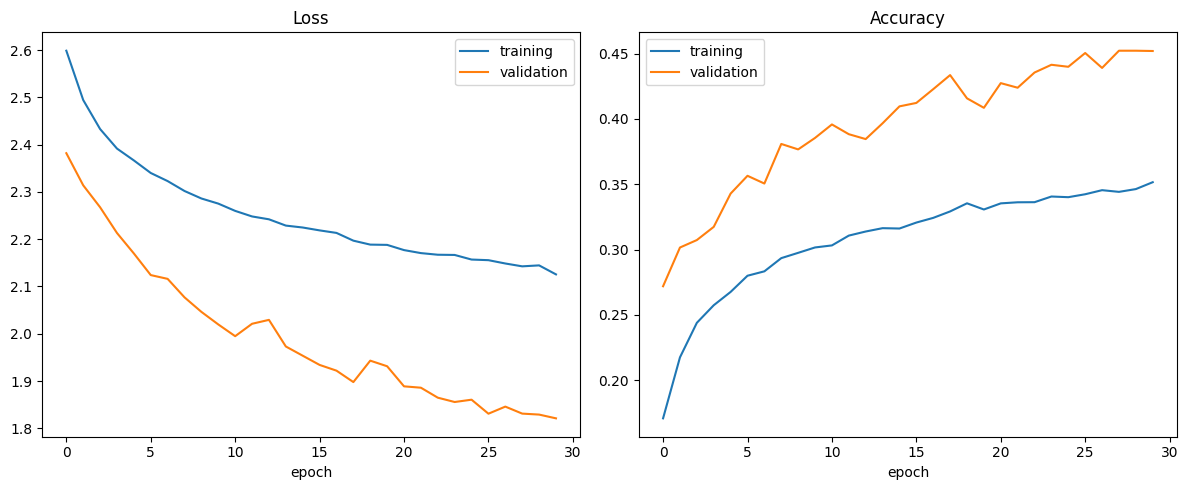

In [49]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Loss")
plt.xlabel("epoch")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

plt.tight_layout()
plt.show()


Hyperparameters tweaked <br>
•	We decided to experiment with the ImageDataGenerator to allow the model to train on more varied images with slightly increased intensity of zoom, shear, rotation, height, and width. We thought that by doing this, it might reduce the underfitting slightly since the images would be more diverse. <br>
Accuracy: The test accuracy dropped from around 56% in the previous iteration to 46.5%. This means the model is now performing worse on unseen data. We think that the drop in performance means the augmentation may have been too strong. The model is learning on images that are overly distorted and no longer represent the original dataset.
Loss: The test loss also increased to 1.79 which is quite a bit higher than the previous value of 1.48. This increase means that the model is struggling to correctly classify the augmented images. The training process might have become harder. <br>
Result: Overall, this iteration did not improve model performance. We learned that while augmentation is typically helpful for making the model more robust, in this case the transformations pushed the model a bit too far resulting in lower accuracy and higher loss. We will be restoring the data augmentation to original values

